 ### Python scripts used for the paper entitled:
 #### Single character insertion-deletion model preserves long indels in ancestral sequence reconstruction

In [5]:
## Python 3
# Scripts for the appendix figures
# Created by: Gholamhossein Jowkar <jowk@zhaw.ch>
# ACGT ZHAW
# Created date: October 2023
# Modified by: jowk
# Modified date: July 2024

In [1]:
import os, sys, time, statistics, json, re, fnmatch, math
from statistics import mean

from Bio import AlignIO, SeqIO

from ete3 import Tree

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import spearmanr, kendalltau, pearsonr

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

path = "./appendix_samples/" #set it to the to the appendix_samples 
os.chdir(path)

# Figures style
sns.set_style('white')
sns.set(rc={"figure.dpi":330, 'savefig.dpi':330})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
color_1 = sns.color_palette()[0]
color_2 = sns.color_palette()[1]

The total tree length: 0.08040999999999998
The branch length list: [0.00345, 0.00637, 0.02506, 0.00484, 0.00285, 0.0011, 0.00302, 0.00665, 0.00823, 0.01884, 0.0]
The branch length list: [0.06766, 0.08055, 0.17706, 0.01097, 0.01101, 0.0001, 0.0001, 0.05973, 0.07313, 0.18448, 0.0]


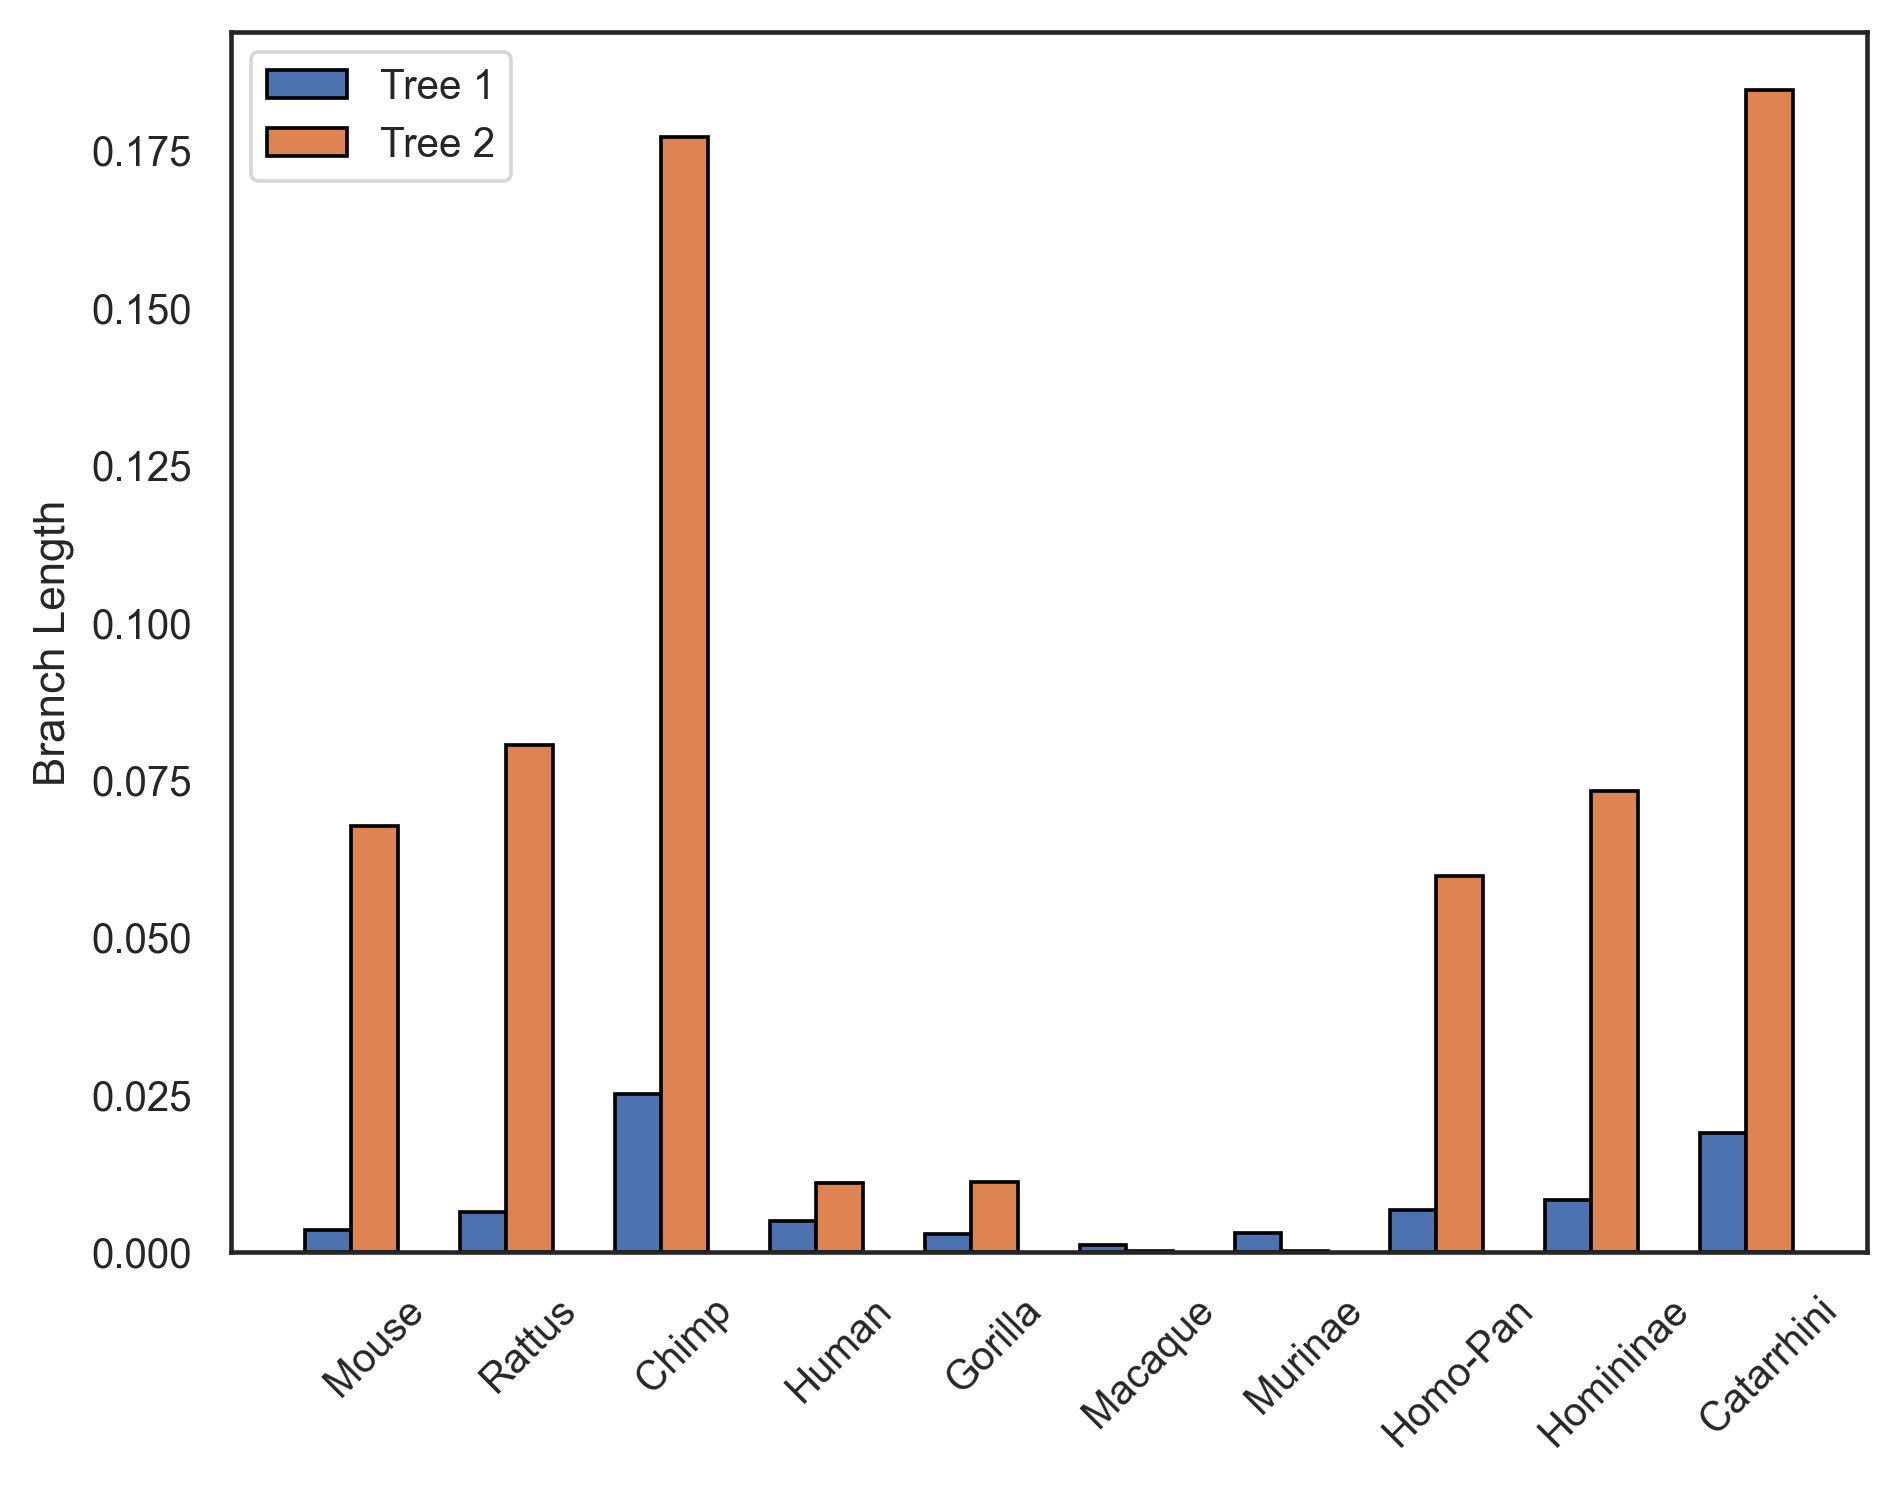

In [6]:
#*****************************************************************
#----------------------- Define functions ------------------------
#*****************************************************************
def get_branch_lengths(tree):
    lst_br_len = []
    total_tr_len = 0
    for n in tree.traverse(strategy="postorder"):
        total_tr_len += n.dist
        lst_br_len.append(n.dist)        
    return total_tr_len, lst_br_len
  

#*****************************************************************
#--------------------------- Main code ---------------------------
#*****************************************************************
            
# Read the Newick trees
newick_tree1 = Tree('./indelible_971152.arpiptree.nwk',format=1)
newick_tree2 = Tree('./indelible_1000131.arpiptree.nwk',format=1)



# Get branch lengths from both trees
total_tr1, branch_lengths_tree1 = get_branch_lengths(newick_tree1)
total_tr2, branch_lengths_tree2 = get_branch_lengths(newick_tree2)

print("The total tree length:", total_tr1)
print("The branch length list:", branch_lengths_tree1)
print("The branch length list:", branch_lengths_tree2)

branch_lengths_tree1.pop()
branch_lengths_tree2.pop()

sp_names =['Mouse', 'Rattus', 'Chimp', 'Human', 'Gorilla', 'Macaque', 
                    'Murinae', 'Homo-Pan', 'Homininae', 'Catarrhini']

barWidth = 0.3


r1 = np.arange(len(branch_lengths_tree1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, branch_lengths_tree1, width = barWidth, color = color_1, edgecolor = 'black', capsize=7, label='Tree 1')
 
# Create cyan bars
plt.bar(r2, branch_lengths_tree2, width = barWidth, color = color_2, edgecolor = 'black',  capsize=7, label='Tree 2')
 

# general layout
plt.xticks([r + barWidth for r in range(len(branch_lengths_tree1))], sp_names)
plt.ylabel('Branch Length')
plt.legend()
plt.xticks(rotation=45)

# Show graphic
plt.show()

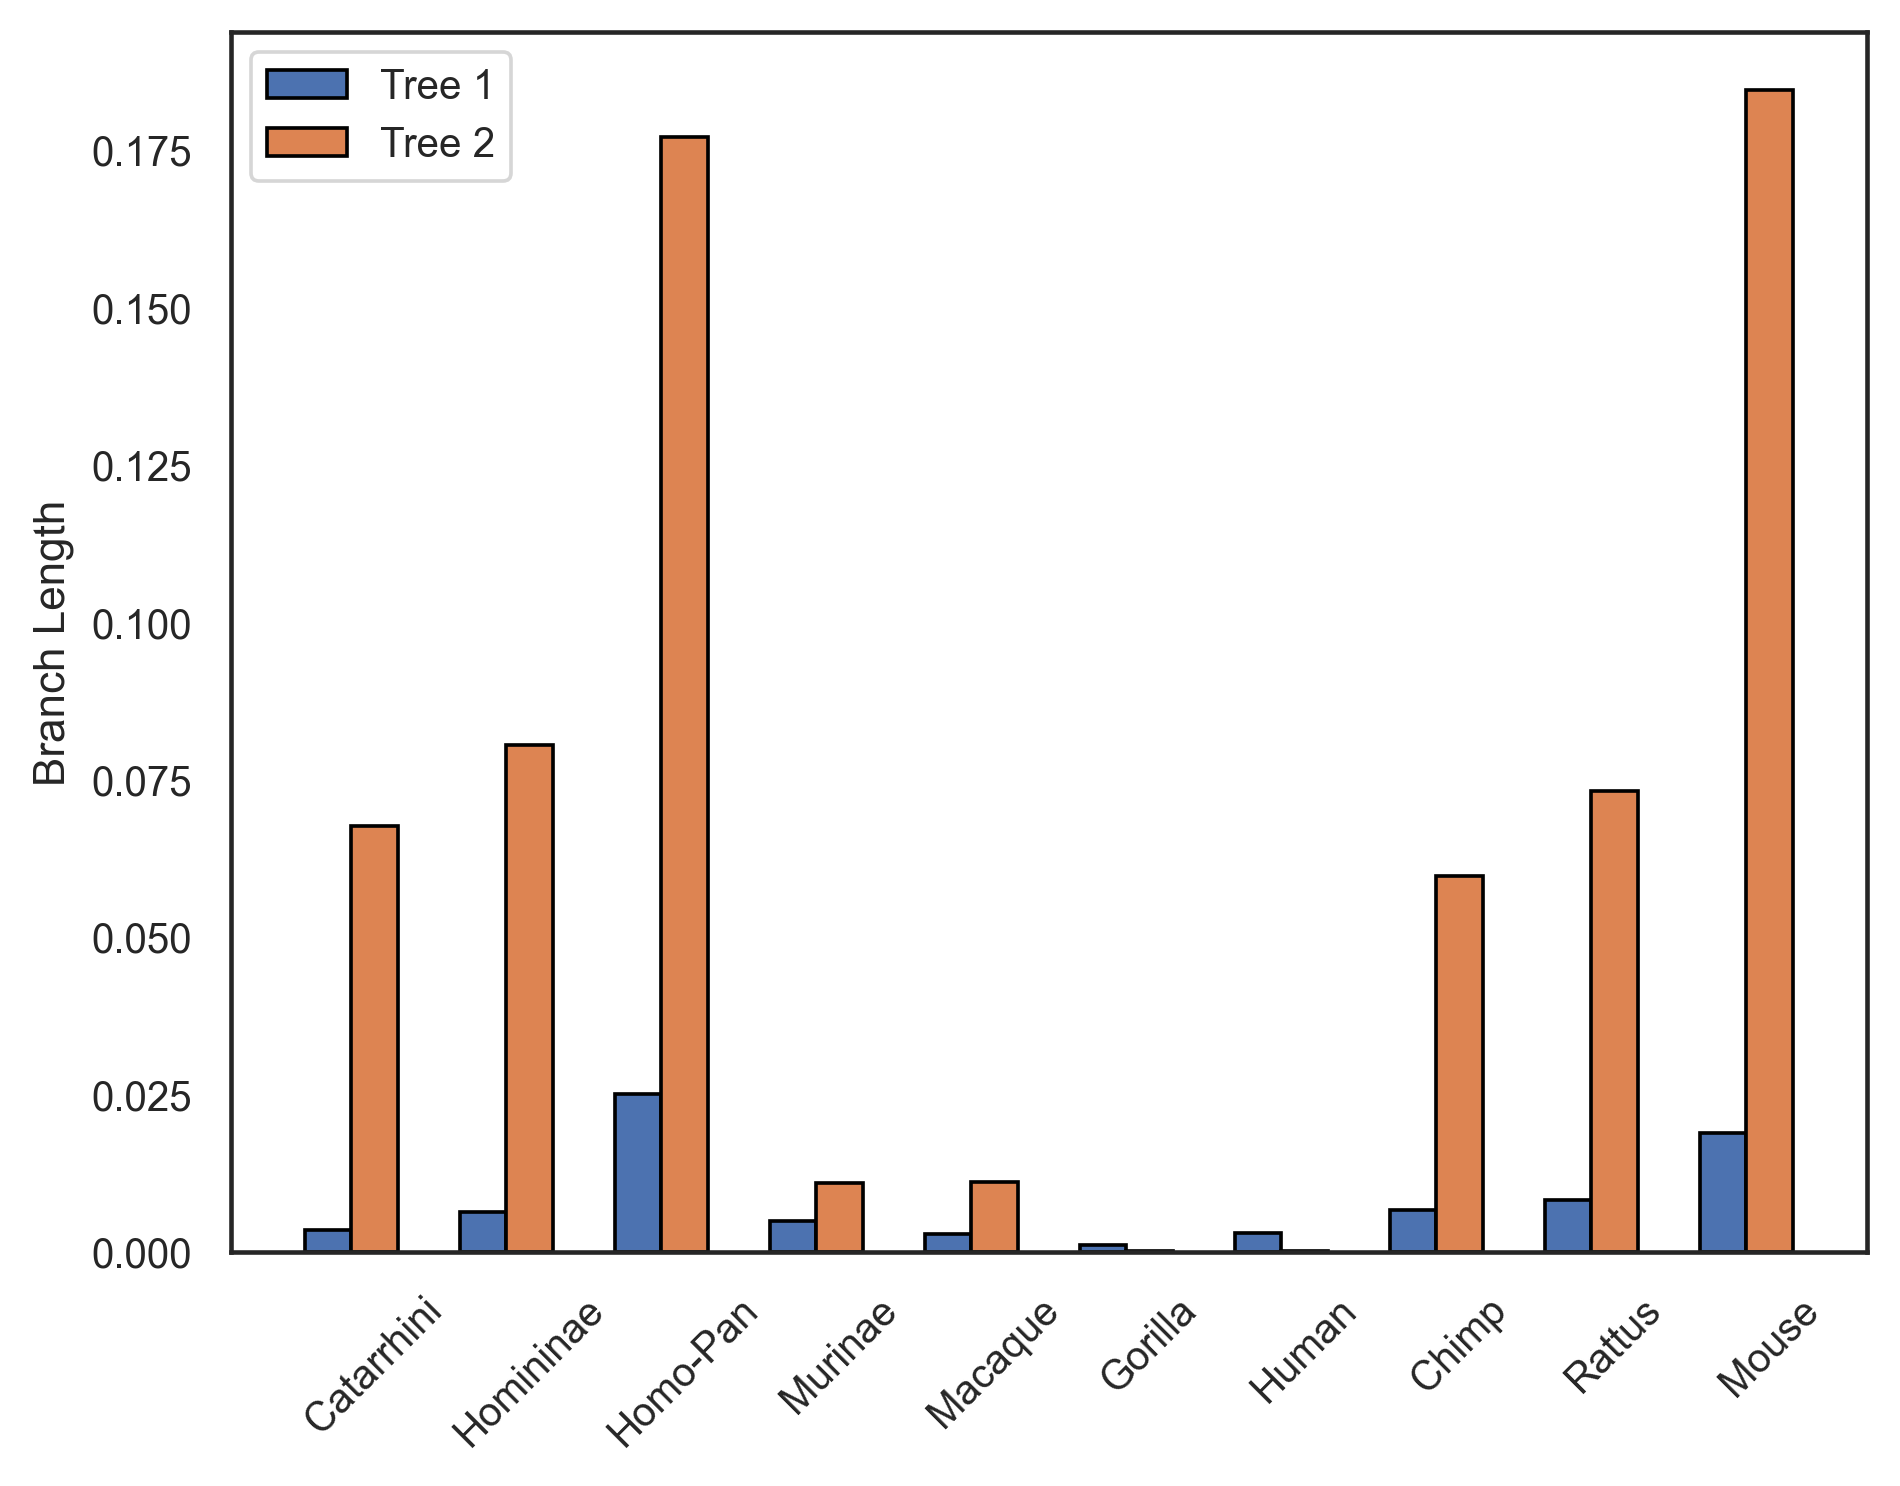

In [8]:
# reorder the list of branches

br_len_tr1 = [0.00345, 0.00637, 0.02506, 0.00484, 0.00285, 0.0011, 0.00302, 0.00665, 0.00823, 0.01884]
br_len_tr1.reverse()
br_len_tr2 = [0.06766, 0.08055, 0.17706, 0.01097, 0.01101, 0.0001, 0.0001, 0.05973, 0.07313, 0.18448]
br_len_tr2.reverse()

sp_names =['Mouse', 'Rattus', 'Chimp', 'Human', 'Gorilla', 'Macaque', 
                    'Murinae', 'Homo-Pan', 'Homininae', 'Catarrhini']
sp_names.reverse()

barWidth = 0.3


r1 = np.arange(len(branch_lengths_tree1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, branch_lengths_tree1, width = barWidth, color = color_1, edgecolor = 'black', capsize=7, label='Tree 1')
 
# Create cyan bars
plt.bar(r2, branch_lengths_tree2, width = barWidth, color = color_2, edgecolor = 'black',  capsize=7, label='Tree 2')
 
# general layout
plt.xticks([r + barWidth for r in range(len(branch_lengths_tree1))], sp_names)
plt.ylabel('Branch Length')
plt.legend()
plt.xticks(rotation=45)

# Show graphic
plt.show()

In [10]:
print(os.getcwd())
os.chdir('../')
print(os.getcwd())


Sub-optimal performance          851
Optimal performance              132
Below sub-optimal performance      7
Name: Performance, dtype: int64


C:\Users\jowkar\AppData\Local\Temp\ipykernel_20664\1919083818.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_len.rename(columns={'tree_V2': 'Murinae'}, inplace=True)
C:\Users\jowkar\AppData\Local\Temp\ipykernel_20664\1919083818.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_len.rename(columns={'tree_V5': 'Homo-Pan'}, inplace=True)
C:\Users\jowkar\AppData\Local\Temp\ipykernel_20664\1919083818.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

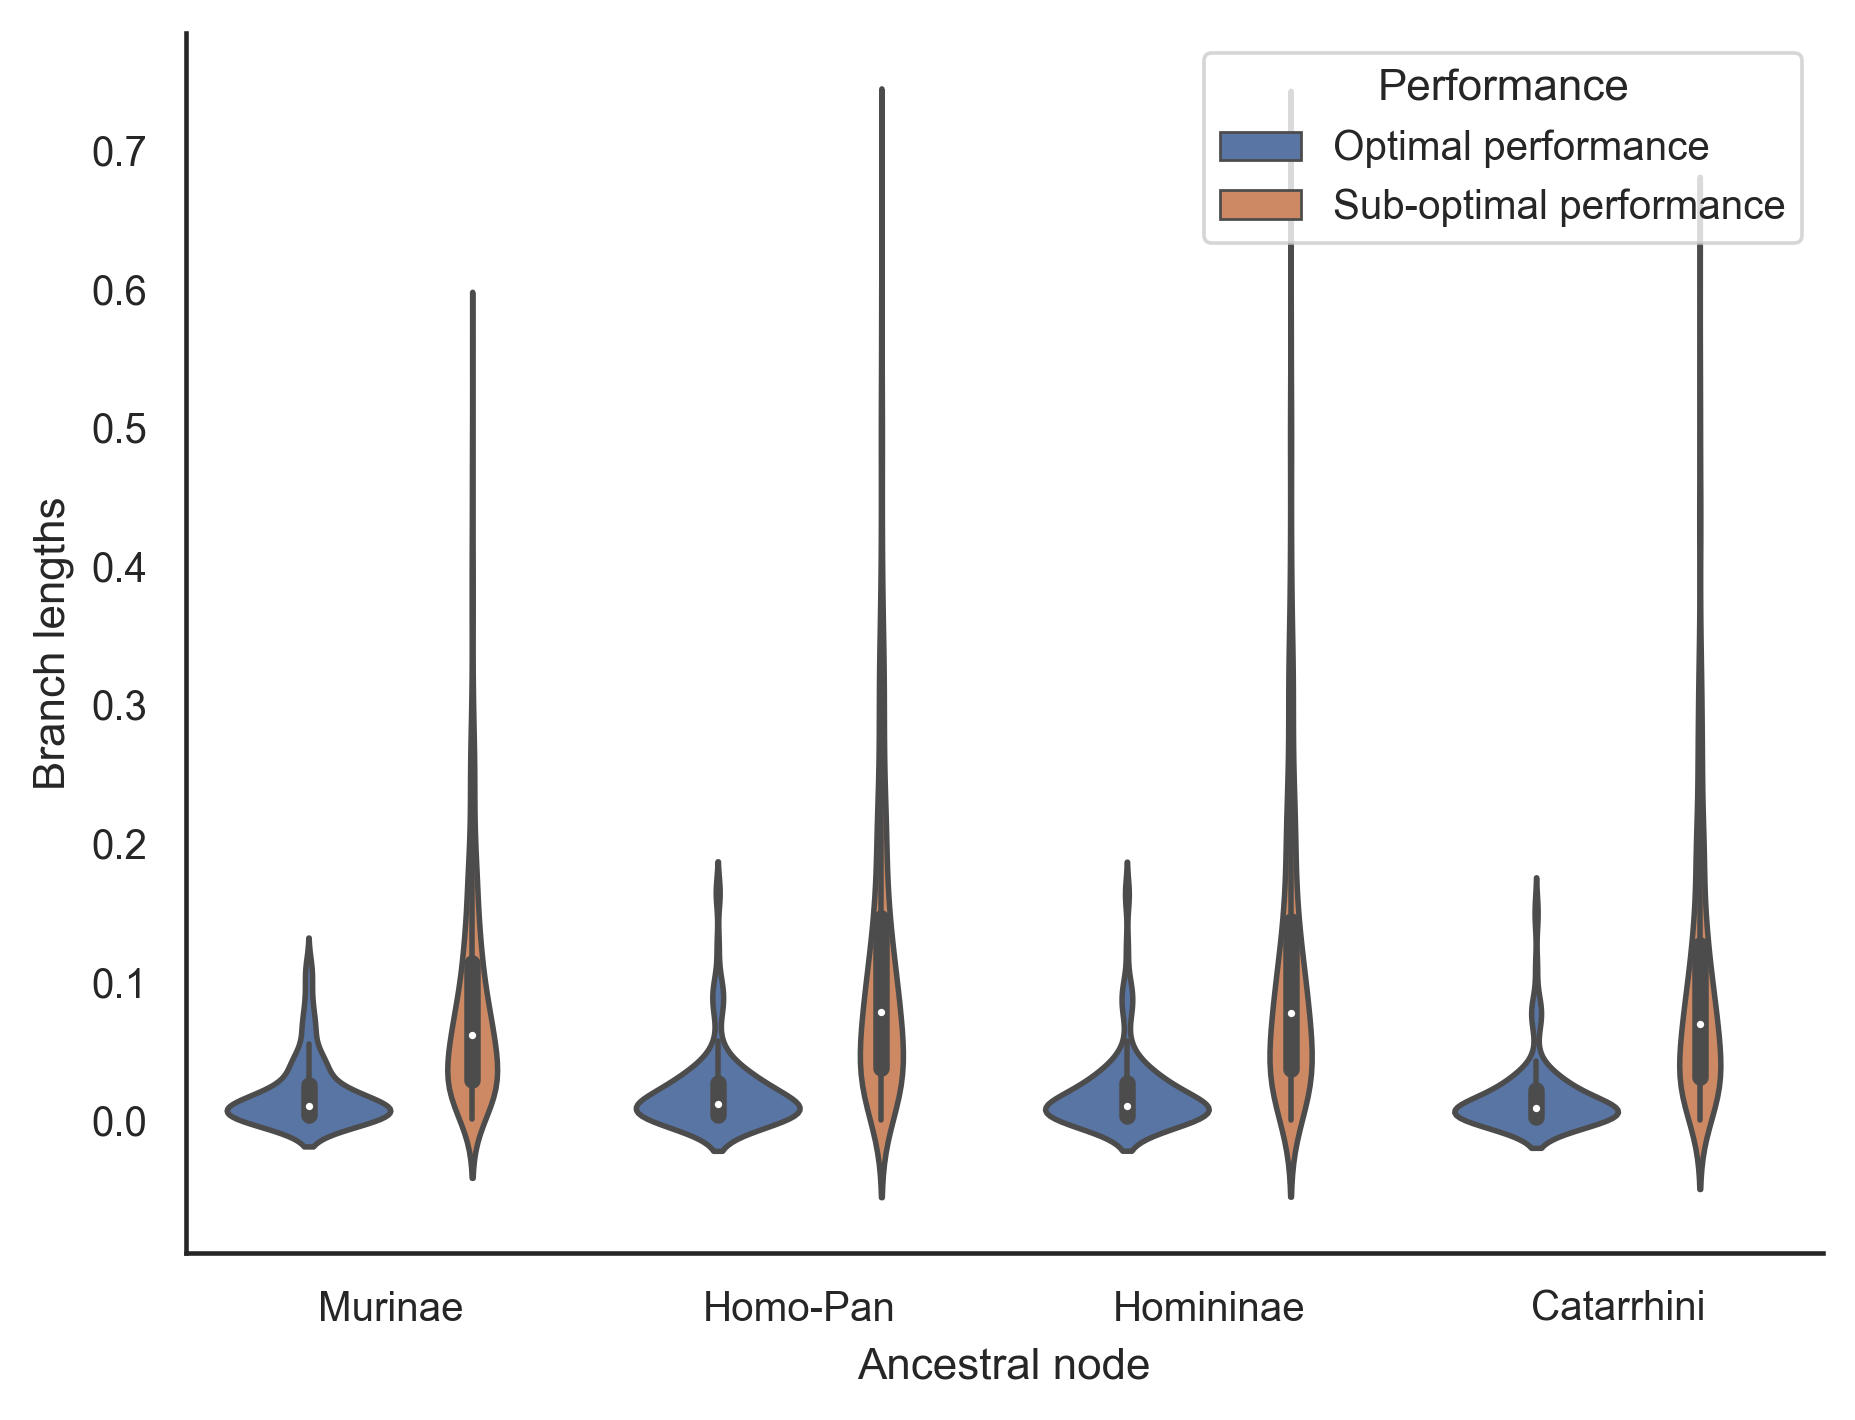

In [6]:

# f-score dataframe
df_f_score = pd.read_csv('./simulation_data/01_acc_pr_oma_df.csv')
df_f_score['Performance'] =  df_f_score['fscore'].apply(lambda x: 'Optimal performance' if x >= 0.99 else 
                                                        'Sub-optimal performance' if 0.70 <= x < 0.99 else
                                                            'Below sub-optimal performance')

df_prf = df_f_score.iloc[:,[0, 7, 9]]
# display(df_prf)

new_label_counts = df_f_score['Performance'].value_counts()
print(new_label_counts)

# branch length dataframe
df_dynamic = pd.read_csv('./simulation_data/02_dynamic_joint_br_seq_len_per_OMA_per_species.csv')
# display(df_dynamic)
df_br_len = df_dynamic.iloc[:,[1,19,20,21,22]]
df_br_len.rename(columns={'tree_V2': 'Murinae'}, inplace=True)
df_br_len.rename(columns={'tree_V5': 'Homo-Pan'}, inplace=True)
df_br_len.rename(columns={'tree_V7': 'Homininae'}, inplace=True)
df_br_len.rename(columns={'tree_V9': 'Catarrhini'}, inplace=True)

# display(df_br_len)

df_merg = pd.merge(df_prf, df_br_len, on='OMA_group')
# display(df_merg.iloc[:,2:7])


# Melt the DataFrame
melted_df = pd.melt(df_merg, id_vars='Performance', value_vars=['Murinae', 'Homo-Pan', 'Homininae', 'Catarrhini'], var_name='Nodes', value_name='br_len')

my_order = ['Optimal performance', 'Sub-optimal performance']
# Plot the split violin plot
fig = sns.violinplot(data=melted_df, x="Nodes", y="br_len", hue="Performance", legend=False, hue_order=my_order )

# Add labels and title
plt.xlabel('Ancestral node')
plt.ylabel('Branch lengths')
# plt.title('Split Violin Plot with Good/Bad Labels')
# fig.set_frame_on(False)

sns.despine()

# Show the plot
plt.show()

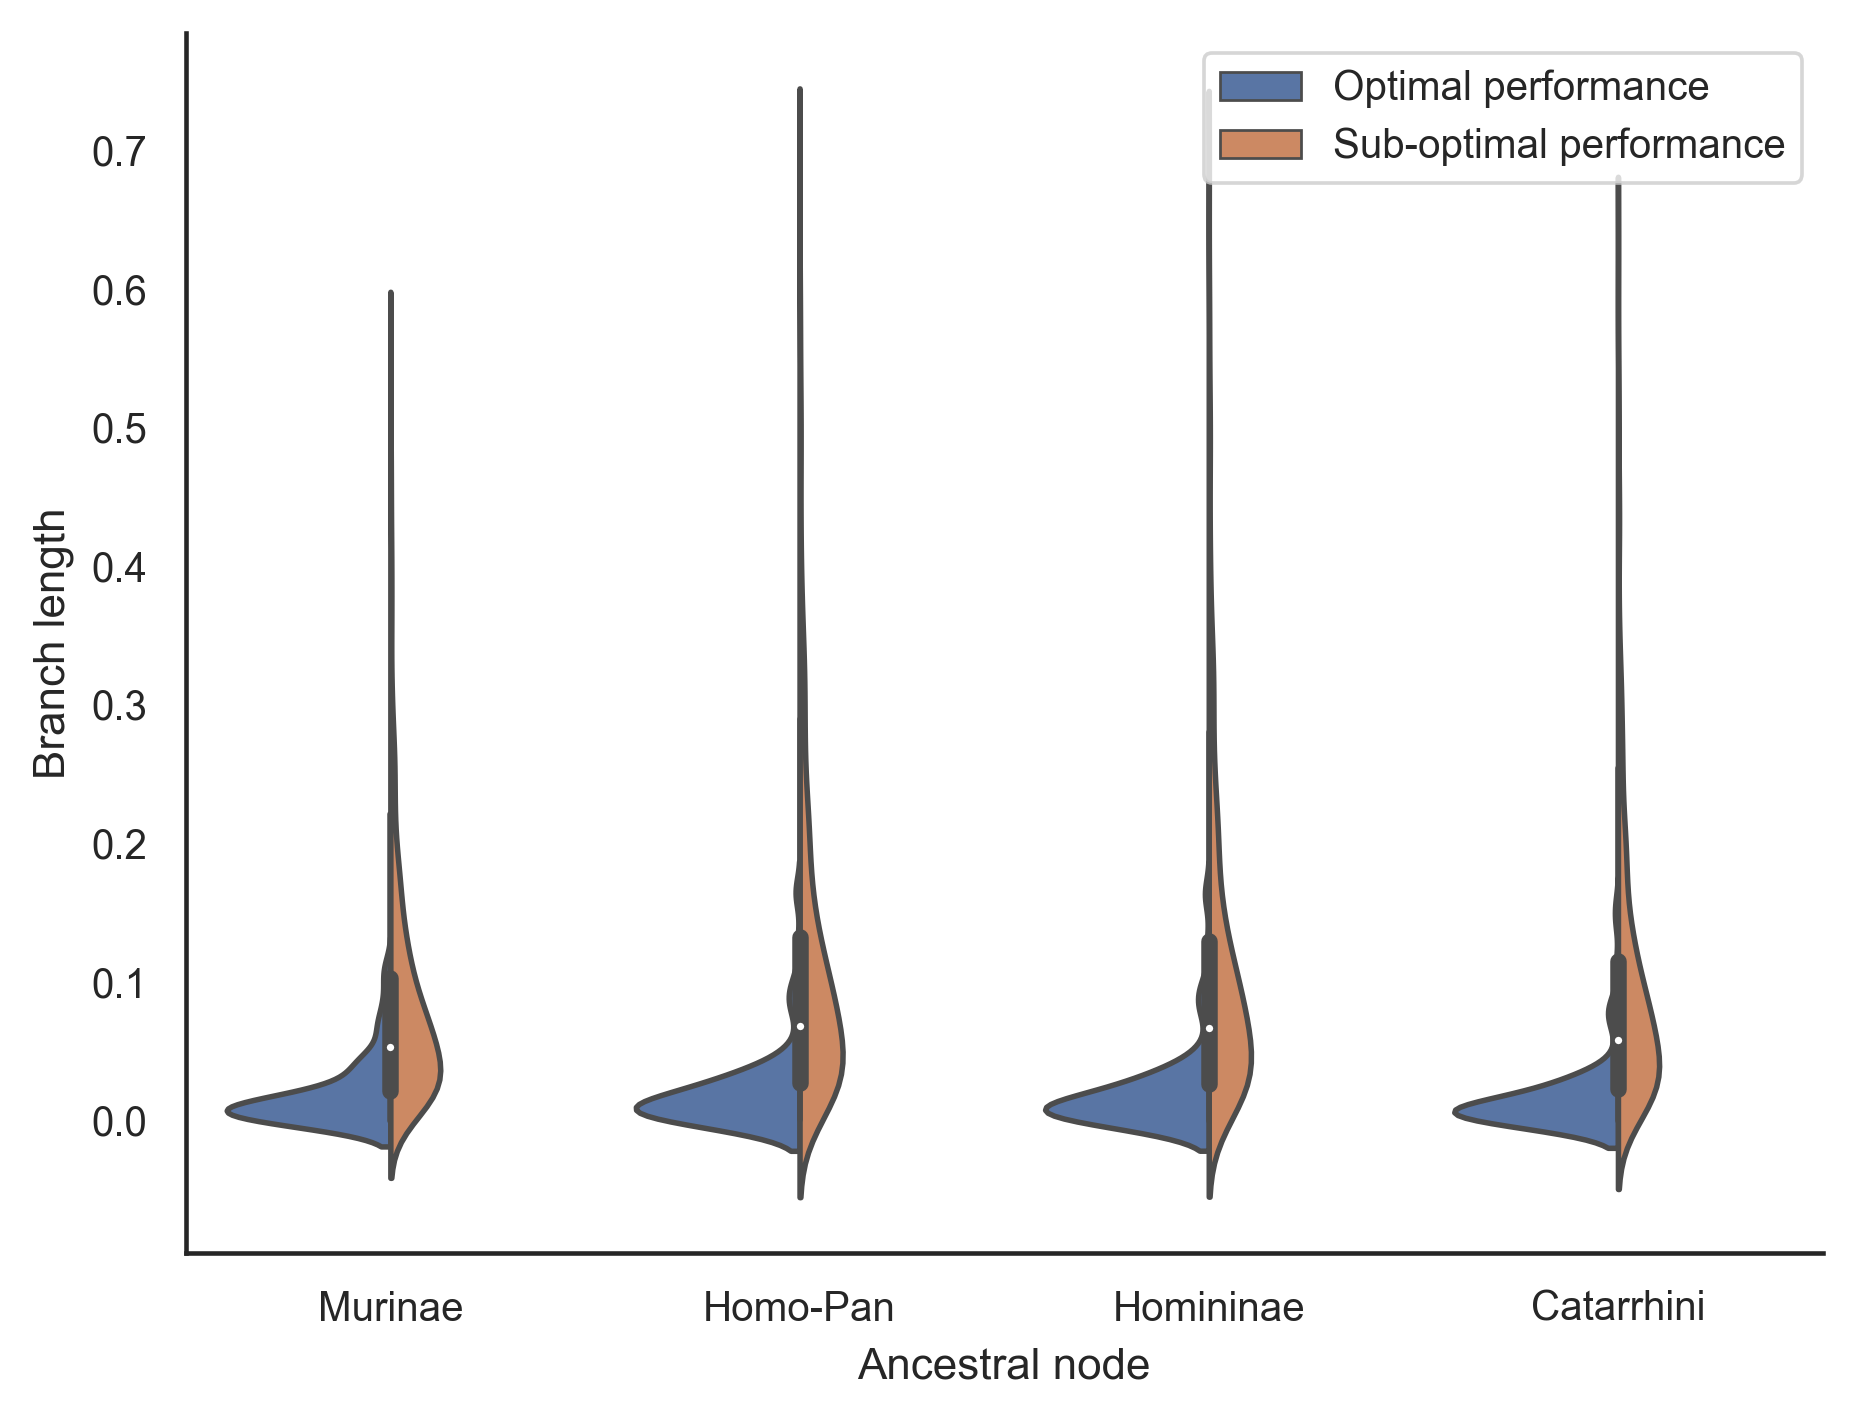

In [7]:
# Or
# Plot the split violin plot

fig = sns.violinplot(data=melted_df, x="Nodes", y="br_len", hue="Performance",split=True, hue_order=my_order)
# fig.set_frame_on(False)
sns.despine()
# Add labels and title
plt.xlabel('Ancestral node')
plt.ylabel('Branch length')
# plt.title('Split Violin Plot with Good/Bad Labels')
plt.legend(title='', loc='upper right')

# Show the plot

plt.show()